In [5]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import os 
import pandas as pd
import numpy as np

In [6]:
TRAIN_DIR='images/train'
TEST_DIR='images/test'

In [9]:
def createdataframe(dir):
    image_paths = []
    labels =[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels    

In [10]:
train = pd.DataFrame()
train['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
test = pd.DataFrame()
test['image'],test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [16]:
from tqdm.notebook import tqdm


In [14]:
def extract_feature(images):
    features =[]
    for image in tqdm(images):
        img =load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features= np.array(features)
    features= features.reshape(len(features),48,48,1)
    return features

In [19]:
train_features = extract_feature(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [20]:
test_features = extract_feature(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [21]:
x_train=train_features/255.0
x_test=test_features/255.0

In [28]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense


In [24]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [25]:
y_train =le.transform(train['label'])
y_test = le.transform(test['label'])

In [26]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [29]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [31]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']  
)

In [32]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.2373 - loss: 1.8405 - val_accuracy: 0.2583 - val_loss: 1.8149
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.2473 - loss: 1.8075 - val_accuracy: 0.2567 - val_loss: 1.7850
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.2578 - loss: 1.7761 - val_accuracy: 0.3174 - val_loss: 1.6962
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.3101 - loss: 1.6987 - val_accuracy: 0.4091 - val_loss: 1.5449
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.3772 - loss: 1.5882 - val_accuracy: 0.4338 - val_loss: 1.4554
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.4206 - loss: 1.5049 - val_accuracy: 0.4809 - val_loss: 1.3505
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.4454 - loss: 1.4420 - val_accuracy: 0.5062 - val_loss: 1.3025
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.4598 - loss: 1.3939 - 

KeyboardInterrupt: 

In [33]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [34]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [35]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [37]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
model prediction is  sad


In [42]:
image = 'images/train/sad/72.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
model prediction is  sad


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
model prediction is  sad


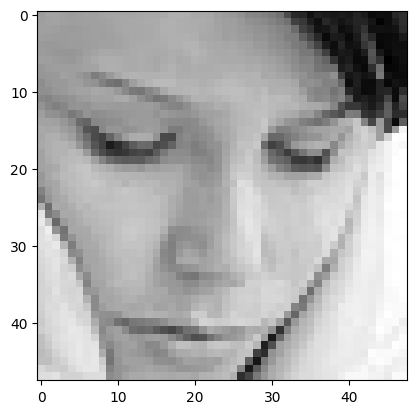

In [44]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')